In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import os

In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
from sklearn.model_selection import train_test_split

In [3]:
import kagglehub

In [4]:
path = kagglehub.dataset_download("mrsimple07/student-exam-performance-prediction")

100%|██████████| 19.3k/19.3k [00:00<00:00, 27.7MB/s]

Extracting files...


In [5]:
print(os.listdir(path))

['student_exam_data_new.csv', 'student_exam_data.csv']


In [6]:
df = pd.read_csv(os.path.join(path, "student_exam_data.csv"))
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


Pre-processamento

In [7]:
df.isnull().sum()

,0
Study Hours,0
Previous Exam Score,0
Pass/Fail,0


In [8]:
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


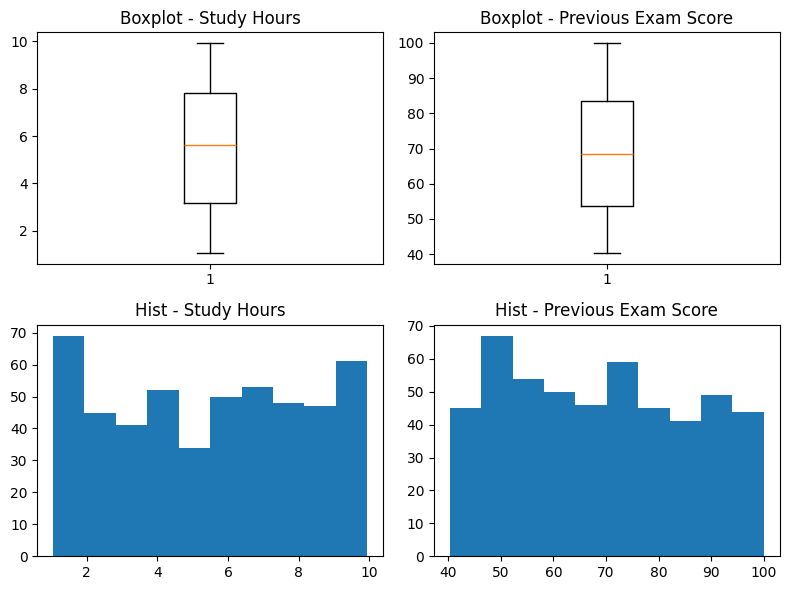

In [44]:
fig,axs = plt.subplots(2,2, figsize=(8,6))

axs[0,0].boxplot(df['Study Hours'])
axs[0,0].set_title('Boxplot - Study Hours')

axs[0,1].boxplot(df['Previous Exam Score'])
axs[0,1].set_title('Boxplot - Previous Exam Score')

axs[1,0].hist(df['Study Hours'])
axs[1,0].set_title('Hist - Study Hours')

axs[1,1].hist(df['Previous Exam Score'])
axs[1,1].set_title('Hist - Previous Exam Score')

plt.tight_layout()
plt.show()

# Normalização e Visualização

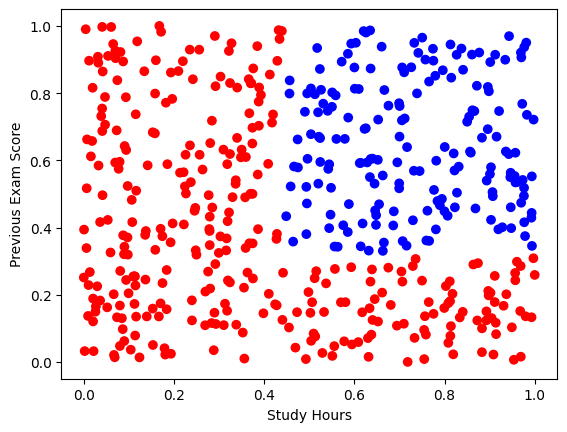

In [11]:
X = df[['Study Hours', 'Previous Exam Score']].values
# normalização
Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc/Xs

Y = df['Pass/Fail'].values
colors = np.array(['r','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.show()

# Dividindo Dataset Treino e Teste

In [12]:
x_train, x_test, y_train, y_test = train_test_split(Xc, Y, test_size=0.2, random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


In [14]:
X_train_tensor = torch.FloatTensor(x_train)
Y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)

X_test_tensor = torch.FloatTensor(x_test)
Y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

In [15]:
Y_train_tensor

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
      

In [16]:
X_train_tensor

tensor([[0.8583, 0.6227],
        [0.0972, 0.5236],
        [0.2897, 0.1465],
        [0.6632, 0.3305],
        [0.0094, 0.1369],
        [0.0845, 0.1300],
        [0.5327, 0.1486],
        [0.6337, 0.1598],
        [0.7620, 0.4500],
        [0.1162, 0.5095],
        [0.7065, 0.2390],
        [0.4954, 0.7992],
        [0.0361, 0.4163],
        [0.7897, 0.4664],
        [0.9688, 0.2855],
        [0.3370, 0.5407],
        [0.9734, 0.5416],
        [0.0195, 0.8160],
        [0.1837, 0.2736],
        [0.0297, 0.2251],
        [0.6605, 0.9383],
        [0.6943, 0.1079],
        [0.5508, 0.8022],
        [0.4903, 0.7445],
        [0.5037, 0.8139],
        [0.3928, 0.7945],
        [0.3276, 0.9485],
        [0.9044, 0.1304],
        [0.8229, 0.4602],
        [0.2456, 0.4498],
        [0.1675, 1.0000],
        [0.8129, 0.0775],
        [0.0072, 0.6623],
        [0.8149, 0.8460],
        [0.9691, 0.0155],
        [0.1933, 0.0243],
        [0.9063, 0.5055],
        [0.4565, 0.8378],
        [0.5

In [17]:
model = nn.Linear(2,1)

In [18]:
model.state_dict()

OrderedDict([('weight', tensor([[0.1123, 0.2393]])),
             ('bias', tensor([0.0968]))])

# Fazendo predict

In [19]:
out = model(X_train_tensor[:4,:]) # 4 amostras
out

tensor([[0.3422],
        [0.2331],
        [0.1644],
        [0.2504]], grad_fn=<AddmmBackward0>)

In [20]:
oo = F.softmax(out,dim=1)
oo


tensor([[1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SoftmaxBackward0>)

# Calculando as probabilidades com Softmax

In [21]:
F.softmax(out,dim=1)*100

tensor([[100.],
        [100.],
        [100.],
        [100.]], grad_fn=<MulBackward0>)

In [22]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([0, 0, 0, 0])
tensor([1., 1., 1., 1.], grad_fn=<MaxBackward0>)


# Treinamento

In [23]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

def predict_prob(model, inputs):
    outputs = model(Variable(inputs))
    outputs = F.softmax(outputs,dim=1)
    predicts, _ = torch.max(outputs, 1)

    return predicts.data.numpy()

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax2.set_title('Fronteiras de decisão')

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax3.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax3.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax3.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                #Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
                Zc = predict(self.model,torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.Paired)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                Zp = predict_prob(self.model,torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.magma)
                colors = np.array(['r','y','b'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

In [24]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.BCEWithLogitsLoss()


In [25]:
nb_epoch = 10000

losses = []
losses_test = []
acc_list = []
acc_test_list = []
for i in range(nb_epoch):
    # predict da rede
    output = model(X_train_tensor)
    output_test = model(X_test_tensor)

    # calcula a perda
    loss = criterion(output, Y_train_tensor)
    loss_test = criterion(output_test, Y_test_tensor)

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())
    losses_test.append(loss_test.data.item())

    # cálculo das probabilidades com sigmoid
    train_prob = torch.sigmoid(output)
    test_prob = torch.sigmoid(output_test)

    # converte para classe (0 ou 1) usando threshold 0.5
    train_pred = (train_prob >= 0.5).float()
    test_pred = (test_prob >= 0.5).float()

    # calcula acurácia
    acc_list.append((train_pred == Y_train_tensor).float().mean())
    acc_test_list.append((test_pred == Y_test_tensor).float().mean())

    final_loss = loss.data.item()

print('Final loss:', final_loss)

Final loss: 0.25833651423454285


In [26]:
print(acc_list)

[tensor(0.3700), tensor(0.3700), tensor(0.3700), tensor(0.3700), tensor(0.3750), tensor(0.4075), tensor(0.4675), tensor(0.5425), tensor(0.6450), tensor(0.7475), tensor(0.8100), tensor(0.8250), tensor(0.8175), tensor(0.8100), tensor(0.7975), tensor(0.7650), tensor(0.7450), tensor(0.7225), tensor(0.7050), tensor(0.6675), tensor(0.6575), tensor(0.6500), tensor(0.6425), tensor(0.6400), tensor(0.6375), tensor(0.6325), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6300), tensor(0.6325), tensor(0.6325), tensor(0.6350), tensor(0.6375), tensor(0.6375), tensor(0.6400), tensor(0.6425), tensor(0.6425), tensor(0.6425), tensor(0.6425), tensor(0.6425), tensor(0.6450), tensor(0.6475), tensor(0.6475), tensor(0.6475), tensor(0.6475), tensor(

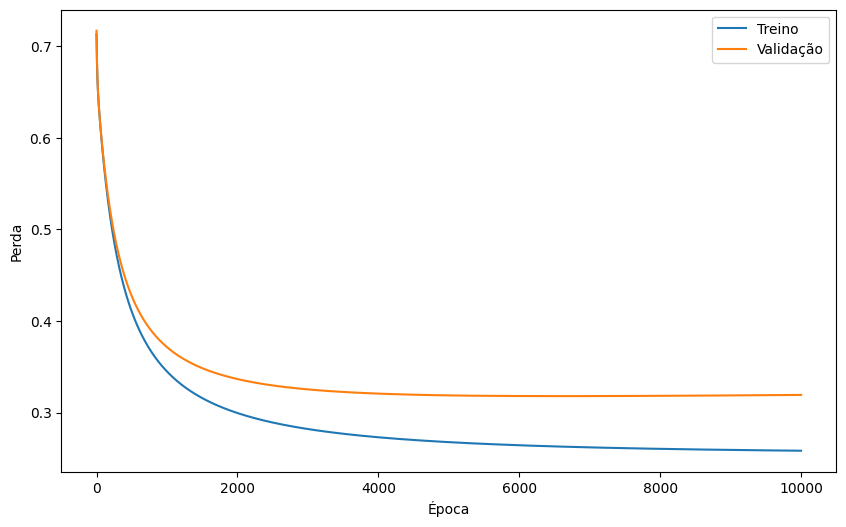

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(nb_epoch)), losses, label='Treino')
plt.plot(list(range(nb_epoch)), losses_test, label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

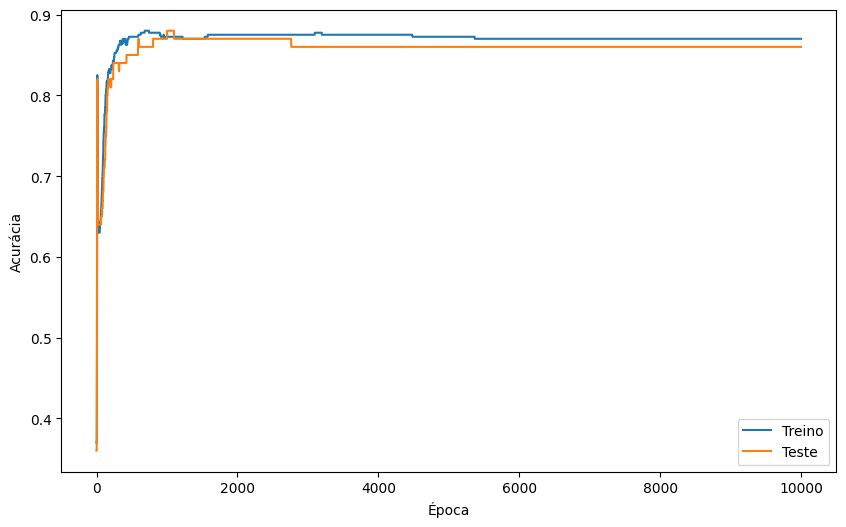

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(nb_epoch)), acc_list, label='Treino')
plt.plot(list(range(nb_epoch)), acc_test_list, label='Teste')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Parâmetros após Treinamento

In [29]:
model.state_dict()

OrderedDict([('weight', tensor([[9.0699, 7.7552]])),
             ('bias', tensor([-9.7480]))])

In [30]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/Student_Exam_Performance.pt')

In [31]:
! ls ../models/

Student_Exam_Performance.pt


In [32]:
nn.init.constant(model.weight,0)
model.state_dict()

/tmp/ipython-input-952960416.py:1: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  nn.init.constant(model.weight,0)


OrderedDict([('weight', tensor([[0., 0.]])), ('bias', tensor([-9.7480]))])

In [34]:
param_saved = torch.load('../models/Student_Exam_Performance.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight', tensor([[9.0699, 7.7552]])),
             ('bias', tensor([-9.7480]))])

In [40]:
accuracy_test = (Y_pred == Y_test_tensor).float().mean()
print("Test Accuracy:", accuracy_test.item())

Test Accuracy: 0.6399999856948853
